In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-s9xqcjbx because the default path (/home/drifter/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [4]:
clean = pd.read_csv('../raw_data/grouped_cleaned_data.csv')
clean.head()

,adm0_name,type,pt_name,um_name,mp_price,conv_rate,usd_rate
0,Afghanistan,Bread,Retail,KG,50.344430,103.255653,0.487571
1,Afghanistan,Oil (cooking),Retail,KG,103.044485,103.255653,0.997955
2,Afghanistan,Pulses,Retail,KG,95.488971,103.255653,0.924782
3,Afghanistan,Rice (high quality),Retail,KG,87.189706,103.255653,0.844406
4,Afghanistan,Rice (low quality),Retail,KG,48.832043,103.255653,0.472924


In [5]:
def string_cleaner(string):
    chars = '-@!#$%&()\/:,'

    for char in chars:
        string = string.replace(char, ' ')
    return string

In [6]:
clean['type'] = clean['type'].apply(lambda x: string_cleaner(x))

In [7]:
clean.head(3)

,adm0_name,type,pt_name,um_name,mp_price,conv_rate,usd_rate
0,Afghanistan,Bread,Retail,KG,50.344430,103.255653,0.487571
1,Afghanistan,Oil cooking,Retail,KG,103.044485,103.255653,0.997955
2,Afghanistan,Pulses,Retail,KG,95.488971,103.255653,0.924782


### api's

In [8]:
def nutrients_redux(food):
    
    product=food
   
    
    API_KEY = 'zYKJIFsOxODivrK9dGg8Y2UUWxkr2j2HMNYXLLwf'
    
    params = {
        'api_key': API_KEY,
        'query': product,
        'pageSize': 1,
        'numberOfResultsPerPage': 1,
        #'dataType':"Foundation"
    }
    response = requests.get(' https://api.nal.usda.gov/fdc/v1/foods/search', params=params).json()
    
    protein = 'not found'
    fat = 'not found'
    carb = 'not found'
    sugar = 'not found'
    sodium = 'not found'
    cholesterol = 'not found'
    calcium = 'not found'
    energy = 'not found'
    size = 100
    unit = 'g'
    category='not found'
    
    if response['totalHits'] != 0:
        try:

            for element in response['foods'][0]['foodNutrients']:
                if element['nutrientName'] == 'Protein':
                    protein = element['value']
                if element['nutrientName'] == 'Total lipid (fat)':
                    fat = element['value']
                if element['nutrientName'] == 'Carbohydrate, by difference':
                    carb = element['value']
                if element['nutrientName'] == 'Sugars, Total NLEA' or 'Sugars, total including NLEA':
                    sugar = element['value']
                if element['nutrientName'] == 'Sodium, Na':
                    sodium = element['value']
                if element['nutrientName'] == 'Cholesterol':
                    cholesterol = element['value']
                if element['nutrientName'] == 'Calcium, Ca':
                    calcium = element['value']
                if element['nutrientName'] == 'Energy':
                    energy = element['value']
            size = response['foods'][0]['servingSize']
            unit = response['foods'][0]['servingSizeUnit']
        except:
            print(f'missing branded info for {food}')

        result = {
            'protein': protein,
            'fat': fat,
            'carb': carb,
            'sugar': sugar,
            'sodium': sodium,
            'cholesterol': cholesterol,
            'calcium': calcium,
            'kcal': energy,
            'size': size,
            'unit': unit,
            'category': response['foods'][0]['foodCategory']
        }
        return result
    
    result = {
            'protein': protein,
            'fat': fat,
            'carb': carb,
            'sugar': sugar,
            'sodium': sodium,
            'cholesterol': cholesterol,
            'calcium': calcium,
            'kcal': energy,
            'size': 'not found',
            'unit': 'not found',
            'category': category
    }
    print('process failed')
        
    return result

In [9]:
def nutrients_redux_2(food):
    
    product=food
   
    
    API_KEY = 'zYKJIFsOxODivrK9dGg8Y2UUWxkr2j2HMNYXLLwf'
    
    params = {
        'api_key': API_KEY,
        'query': product,
        'pageSize': 1,
        'numberOfResultsPerPage': 1,
        'dataType': "Foundation"
    }
    response = requests.get(' https://api.nal.usda.gov/fdc/v1/foods/search', params=params).json()
    
    protein = 'not found'
    fat = 'not found'
    carb = 'not found'
    sugar = 'not found'
    sodium = 'not found'
    cholesterol = 'not found'
    calcium = 'not found'
    energy = 'not found'
    size = 100
    unit = 'g'
    category = 'not found'
    
    if response['totalHits'] != 0:
        try:

            for element in response['foods'][0]['foodNutrients']:
                if element['nutrientName'] == 'Protein':
                    protein = element['value']
                if element['nutrientName'] == 'Total lipid (fat)':
                    fat = element['value']
                if element['nutrientName'] == 'Carbohydrate, by difference':
                    carb = element['value']
                if element['nutrientName'] == 'Sugars, Total NLEA' or 'Sugars, total including NLEA':
                    sugar = element['value']
                if element['nutrientName'] == 'Sodium, Na':
                    sodium = element['value']
                if element['nutrientName'] == 'Cholesterol':
                    cholesterol = element['value']
                if element['nutrientName'] == 'Calcium, Ca':
                    calcium = element['value']
                if element['nutrientName'] == 'Energy':
                    energy = element['value']
            size = response['foods'][0]['servingSize']
            unit = response['foods'][0]['servingSizeUnit']
        except:
            print(f'missing foundation info for {food}')
    
        result = {
            'protein': protein,
            'fat': fat,
            'carb': carb,
            'sugar': sugar,
            'sodium': sodium,
            'cholesterol': cholesterol,
            'calcium': calcium,
            'kcal': energy,
            'size': size,
            'unit': unit,
            'category': response['foods'][0]['foodCategory']
        }
        return result
    
    result = {
            'protein': protein,
            'fat': fat,
            'carb': carb,
            'sugar': sugar,
            'sodium': sodium,
            'cholesterol': cholesterol,
            'calcium': calcium,
            'kcal': energy,
            'size': 'not found',
            'unit': 'not found',
            'category': category
    }
    
    return result

In [10]:
#a function to call the other two functions if the first fails
def nutrients_super(food):
    
    try:
        product=food

        result = nutrients_redux_2(product)

        if sum(x== 'not found' for x in result.values()) >= 3:
            result = nutrients_redux(product)
            print('switched to branded')
        else:
            print('foundation')
    except:
        print('crashed, forced nutrients_redux')
        result = nutrients_redux(product)
    return result

In [11]:
def nutrients(food):
    
    product=food
   
    
    API_KEY = 'zYKJIFsOxODivrK9dGg8Y2UUWxkr2j2HMNYXLLwf'
    
    params = {
        'api_key': API_KEY,
        'query': product,
        'pageSize': 1,
        'numberOfResultsPerPage': 1
    }
    response = requests.get(' https://api.nal.usda.gov/fdc/v1/foods/search', params=params).json()
    
    for element in response['foods'][0]['foodNutrients']:
        print(f'{product} has {element["value"]} {element["unitName"]} of {element["nutrientName"]}')

### getting food types

In [12]:
food_types = pd.DataFrame(clean['type'].unique(), columns=['food_type'])
food_types

,food_type
0,Bread
1,Oil cooking
2,Pulses
3,Rice high quality
4,Rice low quality
...,...
401,Zucchini
402,Beans kidney red
403,Peas yellow split
404,Maize meal white breakfast


In [13]:
food_types['protein'] = None
food_types['fat'] = None
food_types['carb'] = None
food_types['sugar'] = None
food_types['sodium'] = None
food_types['cholesterol'] = None
food_types['calcium'] = None
food_types['kcal'] = None
food_types['size'] = None
food_types['unit'] = None
food_types['category'] = None

In [14]:
for index, row in food_types.iterrows():
    food_nutrients = nutrients_super(row['food_type'])
    food_types.loc[index, 'protein'] = food_nutrients['protein']
    food_types.loc[index, 'fat'] = food_nutrients['fat']
    food_types.loc[index, 'carb'] = food_nutrients['carb']
    food_types.loc[index, 'sugar'] = food_nutrients['sugar']
    food_types.loc[index, 'cholesterol'] = food_nutrients['cholesterol']
    food_types.loc[index, 'sodium'] = food_nutrients['sodium']
    food_types.loc[index, 'calcium'] = food_nutrients['calcium']
    food_types.loc[index, 'kcal'] = food_nutrients['kcal']
    food_types.loc[index, 'size'] = food_nutrients['size']
    food_types.loc[index, 'unit'] = food_nutrients['unit']
    food_types.loc[index, 'category'] = food_nutrients['category']

missing foundation info for Bread 
foundation
missing foundation info for Oil  cooking  
missing branded info for Oil  cooking  
switched to branded
switched to branded
missing foundation info for Rice  high quality  
foundation
missing foundation info for Rice  low quality  
foundation
missing foundation info for Sugar 
foundation
missing foundation info for Wheat 
foundation
missing foundation info for Wheat flour  high quality  
foundation
missing foundation info for Wheat flour  low quality  
foundation
missing foundation info for Oil  palm  
missing branded info for Oil  palm  
switched to branded
missing foundation info for Oil  soybean  
missing branded info for Oil  soybean  
switched to branded
missing foundation info for Meat  beef  
foundation
missing foundation info for Milk 
foundation
switched to branded
missing foundation info for Rice  white  
foundation
missing foundation info for Wheat flour 
foundation
missing foundation info for Apples  red  
foundation
missing foun

missing foundation info for Meat  chicken  frozen  
foundation
missing foundation info for Oil  vegetable  imported  
missing branded info for Oil  vegetable  imported  
switched to branded
missing foundation info for Rice  broken  imported  
foundation
missing branded info for Sesame 
switched to branded
missing branded info for Squashes 
switched to branded
missing foundation info for Sugar  white  
foundation
missing foundation info for Peanut 
switched to branded
missing branded info for Sorghum  berbere  
switched to branded
switched to branded
missing foundation info for Beans  black  imported  
missing branded info for Beans  black  imported  
switched to branded
missing foundation info for Beans  cranberry  
missing branded info for Beans  cranberry  
switched to branded
missing foundation info for Beans  green  fresh  
foundation
missing foundation info for Beans  red  fresh  
missing branded info for Beans  red  fresh  
switched to branded
missing foundation info for Beans  s

missing foundation info for Fish  goldstripe sardinella  
foundation
missing foundation info for Fish  mullet  catfish  
foundation
missing foundation info for Meat  beef  second quality  
foundation
missing foundation info for Meat  chicken  frozen  imported  
foundation
missing foundation info for Chili  bird's eye  
foundation
missing foundation info for Chili  bird's eye  green  
foundation
missing foundation info for Chili  bird's eye  red  
foundation
missing foundation info for Chili  red  
foundation
missing foundation info for Chili  red  curly  
foundation
missing foundation info for Chili  red  large  
missing branded info for Chili  red  large  
switched to branded
missing foundation info for Eggs 
switched to branded
missing foundation info for Eggs  broiler  
foundation
missing foundation info for Garlic  medium  
missing branded info for Garlic  medium  
switched to branded
missing foundation info for Meat  beef  first quality  
foundation
missing foundation info for Mea

switched to branded
missing foundation info for Cheese  goat  
foundation
missing foundation info for Onions  dry  local  
missing branded info for Onions  dry  local  
switched to branded
missing foundation info for Potatoes  medium size  
missing branded info for Potatoes  medium size  
switched to branded
missing foundation info for Beans  sugar  
foundation
missing foundation info for Meat  beef  minced  
foundation
missing foundation info for Meat  chicken  legs  
foundation
missing foundation info for Meat  chicken  plucked  
foundation
missing foundation info for Yogurt 
foundation
missing foundation info for Beans  haricot  
switched to branded
missing foundation info for Oil  cotton  
missing branded info for Oil  cotton  
switched to branded
missing foundation info for Tea  green  
foundation
missing foundation info for Bread  common  
foundation
missing branded info for Cocoa  powder  
switched to branded
missing foundation info for Meat  veal  
foundation
missing foundation

In [15]:
food_types.shape

(406, 12)

In [16]:
food_types.head(3)

,food_type,protein,fat,carb,sugar,sodium,cholesterol,calcium,kcal,size,unit,category
0,Bread,9.43,3.59,49.2,3.45,477,not found,211,1130.0,100,g,Baked Products
1,Oil cooking,1.26,3.24,30.9,1.2,116,0.0,3.0,144,100,g,Other starchy vegetables
2,Pulses,17.9,7.14,60.7,0.0,393,0.0,107,393,28.0,g,"Chips, Pretzels & Snacks"


In [17]:
for nutrient in food_types:
    missing = len(food_types[nutrient].loc[food_types[nutrient]== 'not found'])
    
    print(nutrient, 'is missing', missing/len(food_types), 'percent')

food_type is missing 0.0 percent
protein is missing 0.017241379310344827 percent
fat is missing 0.019704433497536946 percent
carb is missing 0.029556650246305417 percent
sugar is missing 0.0049261083743842365 percent
sodium is missing 0.034482758620689655 percent
cholesterol is missing 0.45073891625615764 percent
calcium is missing 0.034482758620689655 percent
kcal is missing 0.0812807881773399 percent
size is missing 0.0049261083743842365 percent
unit is missing 0.0049261083743842365 percent
category is missing 0.0049261083743842365 percent


In [18]:
#changing all not found to np.nan
food_types = food_types.replace('not found', np.nan)


In [19]:
food_types.head(3)

,food_type,protein,fat,carb,sugar,sodium,cholesterol,calcium,kcal,size,unit,category
0,Bread,9.43,3.59,49.2,3.45,477.0,NaN,211.0,1130.0,100.0,g,Baked Products
1,Oil cooking,1.26,3.24,30.9,1.20,116.0,0.0,3.0,144.0,100.0,g,Other starchy vegetables
2,Pulses,17.90,7.14,60.7,0.00,393.0,0.0,107.0,393.0,28.0,g,"Chips, Pretzels & Snacks"


In [20]:
#dropping every row with 7 or more np.nans

food_types = food_types.dropna(thresh=4)

In [21]:
for nutrient in food_types:
    missing = len(food_types[nutrient].loc[food_types[nutrient]== 'not found'])
    
    print(nutrient, 'is missing', missing/len(food_types), 'percent')

food_type is missing 0.0 percent
protein is missing 0.0 percent
fat is missing 0.0 percent
carb is missing 0.0 percent
sugar is missing 0.0 percent
sodium is missing 0.0 percent
cholesterol is missing 0.0 percent
calcium is missing 0.0 percent
kcal is missing 0.0 percent
size is missing 0.0 percent
unit is missing 0.0 percent
category is missing 0.0 percent


In [22]:
food_types.shape

(404, 12)

In [23]:
food_types.isnull().sum()/len(food_types)

food_type      0.000000
protein        0.012376
fat            0.014851
carb           0.024752
sugar          0.000000
sodium         0.029703
cholesterol    0.448020
calcium        0.029703
kcal           0.076733
size           0.000000
unit           0.000000
category       0.000000
dtype: float64

In [24]:
#this cell should be ran once
#food_types.drop(columns=['cholesterol'],inplace=True)



In [25]:
food_types

,food_type,protein,fat,carb,sugar,sodium,calcium,kcal,size,unit,category
0,Bread,9.43,3.59,49.20,3.450,477.0,211.0,1130.0,100.0,g,Baked Products
1,Oil cooking,1.26,3.24,30.90,1.200,116.0,3.0,144.0,100.0,g,Other starchy vegetables
2,Pulses,17.90,7.14,60.70,0.000,393.0,107.0,393.0,28.0,g,"Chips, Pretzels & Snacks"
3,Rice high quality,7.19,3.85,75.50,9.680,1.0,10.0,365.0,100.0,g,Cereal Grains and Pasta
4,Rice low quality,7.19,3.85,75.50,9.680,1.0,10.0,365.0,100.0,g,Cereal Grains and Pasta
...,...,...,...,...,...,...,...,...,...,...,...
401,Zucchini,1.05,0.00,4.21,0.000,0.0,21.0,21.0,95.0,g,Pre-Packaged Fruit & Vegetables
402,Beans kidney red,22.50,1.06,61.30,3.200,12.0,83.0,1410.0,100.0,g,Legumes and Legume Products
403,Peas yellow split,4.25,3.38,5.30,0.793,1100.0,63.0,61.0,100.0,g,Spices and Herbs
404,Maize meal white breakfast,6.20,1.74,80.80,1520.000,0.0,0.0,1520.0,100.0,g,Cereal Grains and Pasta


### joining the tables

In [38]:
merged_df = pd.merge(left=clean, right=food_types, left_on='type', right_on='food_type')

In [39]:
merged_df['adm0_name'].nunique()

71

In [40]:
#joining the merged table with cpi

In [41]:
cpi = pd.read_csv('../raw_data/cpi_short.csv')
cpi.drop(columns=['Unnamed: 0'], inplace=True)
cpi.head(3)


,Country Name,2019
0,Afghanistan,149.895975
1,Angola,378.883721
2,Argentina,NaN


In [42]:
merged_df = pd.merge(left=merged_df, right=cpi, left_on='adm0_name', right_on='Country Name')
merged_df.head(3)

,adm0_name,type,pt_name,um_name,mp_price,conv_rate,usd_rate,food_type,protein,fat,carb,sugar,sodium,calcium,kcal,size,unit,category,Country Name,2019
0,Afghanistan,Bread,Retail,KG,50.344430,103.255653,0.487571,Bread,9.43,3.59,49.2,3.45,477.0,211.0,1130.0,100.0,g,Baked Products,Afghanistan,149.895975
1,Afghanistan,Oil cooking,Retail,KG,103.044485,103.255653,0.997955,Oil cooking,1.26,3.24,30.9,1.20,116.0,3.0,144.0,100.0,g,Other starchy vegetables,Afghanistan,149.895975
2,Afghanistan,Pulses,Retail,KG,95.488971,103.255653,0.924782,Pulses,17.90,7.14,60.7,0.00,393.0,107.0,393.0,28.0,g,"Chips, Pretzels & Snacks",Afghanistan,149.895975


In [43]:
merged_df['um_name'].unique()

array(['KG', 'L'], dtype=object)

In [44]:
#converting the values of nutrients to 1 kg or 1 l

merged_df['protein'] = merged_df['protein'] / merged_df['size'] * 1000
merged_df['fat'] = merged_df['fat'] / merged_df['size'] * 1000
merged_df['carb'] = merged_df['carb'] / merged_df['size'] * 1000
merged_df['sugar'] = merged_df['sugar'] / merged_df['size'] * 1000
merged_df['sodium'] = merged_df['sodium'] / merged_df['size'] * 1000
#merged_df['cholesterol'] = merged_df['cholesterol'] / merged_df['size'] * (merged_df['measure']*1000)
merged_df['calcium'] = merged_df['calcium'] / merged_df['size'] * 1000
merged_df['kcal'] = merged_df['kcal'] / merged_df['size'] * 1000

In [45]:
merged_df.head(3)

,adm0_name,type,pt_name,um_name,mp_price,conv_rate,usd_rate,food_type,protein,fat,carb,sugar,sodium,calcium,kcal,size,unit,category,Country Name,2019
0,Afghanistan,Bread,Retail,KG,50.344430,103.255653,0.487571,Bread,94.300000,35.9,492.000000,34.5,4770.000000,2110.000000,11300.000000,100.0,g,Baked Products,Afghanistan,149.895975
1,Afghanistan,Oil cooking,Retail,KG,103.044485,103.255653,0.997955,Oil cooking,12.600000,32.4,309.000000,12.0,1160.000000,30.000000,1440.000000,100.0,g,Other starchy vegetables,Afghanistan,149.895975
2,Afghanistan,Pulses,Retail,KG,95.488971,103.255653,0.924782,Pulses,639.285714,255.0,2167.857143,0.0,14035.714286,3821.428571,14035.714286,28.0,g,"Chips, Pretzels & Snacks",Afghanistan,149.895975


In [46]:
#dropping now unecessary geatures
clean_merged = merged_df.drop(columns=['um_name','conv_rate','food_type','size','unit', 'Country Name','mp_price'])

In [117]:
#clean_merged.drop(columns=['mp_price'], inplace=True)

In [47]:
clean_merged.head(3)

,adm0_name,type,pt_name,usd_rate,protein,fat,carb,sugar,sodium,calcium,kcal,category,2019
0,Afghanistan,Bread,Retail,0.487571,94.300000,35.9,492.000000,34.5,4770.000000,2110.000000,11300.000000,Baked Products,149.895975
1,Afghanistan,Oil cooking,Retail,0.997955,12.600000,32.4,309.000000,12.0,1160.000000,30.000000,1440.000000,Other starchy vegetables,149.895975
2,Afghanistan,Pulses,Retail,0.924782,639.285714,255.0,2167.857143,0.0,14035.714286,3821.428571,14035.714286,"Chips, Pretzels & Snacks",149.895975


In [48]:
clean_merged['expensive'] = 0 

In [49]:
clean_merged['expensive'] = clean_merged['usd_rate'].apply(lambda x: 0 if x < 2 else 1)

In [51]:
#np.std(cheap_food_2['usd_rate'])

NameError: name 'cheap_food_2' is not defined

In [52]:
clean_merged['expensive'].value_counts()

0    976
1    274
Name: expensive, dtype: int64

In [ ]:
#second boolean indexing


In [54]:
#plt.boxplot(cheap_food['usd_rate'])

In [56]:
cheap_food = clean_merged[clean_merged['usd_rate'] <= 70]

In [57]:
cheap_food_2 = clean_merged[clean_merged['usd_rate'] <= 10]


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9e183bbd90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9e1834a4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9e183bba00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e1834ac10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e1834afa0>],
 'means': []}

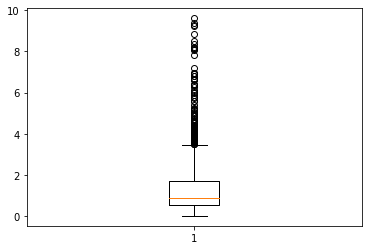

In [60]:
plt.boxplot(cheap_food_2['usd_rate'])

<AxesSubplot:>

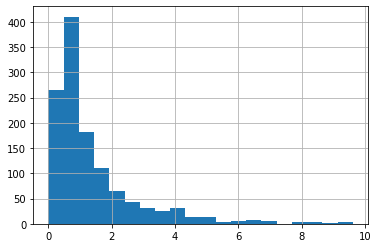

In [61]:
cheap_food_2['usd_rate'].hist(bins=20)

In [62]:
#creating the classification of cheap/expensive
cheap_food_2['expensive'] = cheap_food_2['usd_rate'].apply(lambda x: 0 if x < 1 else 1)

/tmp/ipykernel_4240/2236580953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cheap_food_2['expensive'] = cheap_food_2['usd_rate'].apply(lambda x: 0 if x < 1 else 1)


In [63]:
cheap_food_2['expensive'].value_counts()

0    700
1    527
Name: expensive, dtype: int64

### declaring x and y

In [78]:
y = cheap_food['expensive']
X = cheap_food[['category','pt_name','protein','fat','carb','sugar','sodium','calcium','kcal','2019']]

### pipeline

In [79]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

k_imputer = KNNImputer(n_neighbors=4)

In [80]:
X.head(1)

,category,pt_name,protein,fat,carb,sugar,sodium,calcium,kcal,2019
0,Baked Products,Retail,94.3,35.9,492.0,34.5,4770.0,2110.0,11300.0,149.895975


In [81]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


num_trans = Pipeline([
    ('imputer', KNNImputer(n_neighbors=4)),
    ('sclaer', MinMaxScaler())
])

cat_trans = OneHotEncoder(handle_unknown='ignore', sparse=False)

preprocessor = ColumnTransformer([
    ('num_trans', num_trans,['protein','fat','carb','sugar','sodium','calcium','kcal','2019']),
    ('cat_trans', cat_trans, ['pt_name','category'])
])

In [82]:
import joblib
#joblib.dump(preprocessor,'preprocessor_v1.joblib')

In [83]:
X_t =  preprocessor.fit_transform(X)
X_t

array([[4.71500000e-02, 5.77170418e-03, 4.43243243e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.30000000e-03, 5.20900322e-03, 2.78378378e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.19642857e-01, 4.09967846e-02, 1.95302445e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.37500000e-02, 8.18327974e-03, 6.65765766e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.21543408e-01, 9.00900901e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.05000000e-02, 4.01929260e-04, 4.34234234e-03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

### spliting x and y

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.3)

## models

### linear model

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [310]:
base_model = LinearRegression()

cv_results = cross_validate(base_model, X_train, y_train, cv=5, scoring = ['max_error','r2','neg_mean_squared_error','neg_mean_absolute_error'])
cv_results

{'fit_time': array([0.00621295, 0.0514636 , 0.01617837, 0.006001  , 0.01429915]),
 'score_time': array([0.00713754, 0.0018549 , 0.00786901, 0.00310087, 0.00687551]),
 'test_max_error': array([-6.34330770e+12, -2.07273012e+12, -5.99744134e+12, -3.57106310e+00,
        -5.17267292e+12]),
 'test_r2': array([-5.23018104e+23, -2.98747773e+22, -4.24661746e+23,  4.56240107e-01,
        -7.42262328e+23]),
 'test_neg_mean_squared_error': array([-4.50040459e+23, -2.58807841e+22, -3.04403637e+23, -5.80884608e-01,
        -8.04504602e+23]),
 'test_neg_mean_absolute_error': array([-7.35804350e+10, -1.24863260e+10, -7.39022148e+10, -5.22348927e-01,
        -1.69907307e+11])}

In [311]:
base_results = {
    'test_max_error': cv_results['test_max_error'].mean(),
    'test_r2': cv_results['test_r2'].mean(),
    'test_neg_mean_squared_error': cv_results['test_neg_mean_squared_error'].mean(),
    'test_neg_mean_absolute_error': cv_results['test_neg_mean_absolute_error'].mean()
}
base_results

{'test_max_error': -3917230415990.815,
 'test_r2': -3.439633912157224e+23,
 'test_neg_mean_squared_error': -3.169658962008436e+23,
 'test_neg_mean_absolute_error': -65975256572.384056}

In [312]:
scores = cross_val_score(base_model, X_train, y_train, cv=10)
scores.mean()

-5.3535896305775656e+23

### KNN regressor

In [313]:
from sklearn.neighbors import KNeighborsRegressor

k_model = KNeighborsRegressor(n_neighbors=4)

In [314]:
cv_results_k = cross_validate(k_model, X_train, y_train, cv=5, scoring = ['max_error','r2','neg_mean_squared_error','neg_mean_absolute_error'])

In [315]:
k_model_results = {
    'test_max_error': cv_results_k['test_max_error'].mean(),
    'test_r2': cv_results_k['test_r2'].mean(),
    'test_neg_mean_squared_error': cv_results_k['test_neg_mean_squared_error'].mean(),
    'test_neg_mean_absolute_error': cv_results_k['test_neg_mean_absolute_error'].mean()
}
k_model_results

{'test_max_error': -3.4926854883481164,
 'test_r2': 0.34571223886500324,
 'test_neg_mean_squared_error': -0.5992993895436172,
 'test_neg_mean_absolute_error': -0.5174245259303663}

In [316]:
scores = cross_val_score(k_model, X_train, y_train, cv=10)
scores.mean()

0.3350601570284938

In [155]:
np.mean(y)

2.085463279813331

In [156]:
max(y)

309.4118615861633

## second try

### logistic classification

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
log_model = LogisticRegression()

cv_results_log = cross_validate(log_model, X_train, y_train, cv=5, scoring = ['accuracy'])

In [88]:
cv_results_log['test_accuracy'].mean()

0.8741412151067325

### SVC

In [89]:
from sklearn.svm import SVC

In [90]:
svc_model = SVC()

cv_results_svc = cross_validate(svc_model, X_train, y_train, cv=5, scoring = ['accuracy'])

In [91]:
cv_results_svc['test_accuracy'].mean()

0.8798555008210182

In [92]:
cheap_food_2['expensive'].value_counts().iloc[0]

700

In [93]:
cheap_food_2['expensive'].value_counts().iloc[1]

527

In [94]:
clean_merged['expensive'].value_counts().iloc[0]/clean_merged.shape[0]

0.7808

## the third is the winning one

### neural network

In [95]:
from tensorflow.keras import Sequential, layers

2021-12-14 16:40:04.757070: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-14 16:40:04.757226: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [96]:
X_t.shape

(1249, 71)

In [112]:
food_categories = pd.DataFrame(X['category'].unique(), columns=['product'])

In [113]:
def initialize_model():
    
    model = Sequential()
    
    model.add(layers.Dense(256, input_dim=71, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [114]:
model = initialize_model()

In [115]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=5)

In [116]:

history = model.fit(X_train,y_train, batch_size=16, epochs=170, callbacks=[es])

Epoch 1/170
55/55 [==============================] - 0s 3ms/step - loss: 0.5301 - accuracy: 0.7757
Epoch 2/170
55/55 [==============================] - 0s 3ms/step - loss: 0.3730 - accuracy: 0.8284
Epoch 3/170
55/55 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8822
Epoch 4/170
55/55 [==============================] - 0s 2ms/step - loss: 0.3115 - accuracy: 0.8890
Epoch 5/170
55/55 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8867
Epoch 6/170
55/55 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.8902
Epoch 7/170
55/55 [==============================] - 0s 2ms/step - loss: 0.2961 - accuracy: 0.8810
Epoch 8/170
55/55 [==============================] - 0s 2ms/step - loss: 0.2856 - accuracy: 0.8913
Epoch 9/170
55/55 [==============================] - 0s 2ms/step - loss: 0.2842 - accuracy: 0.8902
Epoch 10/170
55/55 [==============================] - 0s 2ms/step - loss: 0.2894 - accuracy: 0.8844
Epoch 11/

Epoch 37/170
55/55 [==============================] - 0s 2ms/step - loss: 0.2565 - accuracy: 0.9039
Epoch 38/170
55/55 [==============================] - 0s 2ms/step - loss: 0.2599 - accuracy: 0.8982
Epoch 39/170
55/55 [==============================] - 0s 2ms/step - loss: 0.2581 - accuracy: 0.9016
Epoch 40/170
55/55 [==============================] - 0s 2ms/step - loss: 0.2540 - accuracy: 0.9039
Epoch 41/170
55/55 [==============================] - 0s 2ms/step - loss: 0.2540 - accuracy: 0.9073
Epoch 42/170
55/55 [==============================] - 0s 2ms/step - loss: 0.2557 - accuracy: 0.9027
Epoch 43/170
55/55 [==============================] - 0s 2ms/step - loss: 0.2555 - accuracy: 0.9062
Epoch 44/170
55/55 [==============================] - 0s 2ms/step - loss: 0.2589 - accuracy: 0.9016
Epoch 45/170
55/55 [==============================] - 0s 2ms/step - loss: 0.2583 - accuracy: 0.9016
Epoch 46/170
55/55 [==============================] - 0s 2ms/step - loss: 0.2536 - accuracy: 0.9062


Epoch 73/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2485 - accuracy: 0.9062
Epoch 74/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2477 - accuracy: 0.9085
Epoch 75/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2488 - accuracy: 0.9073
Epoch 76/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2475 - accuracy: 0.9085
Epoch 77/170
55/55 [==============================] - 0s 2ms/step - loss: 0.2473 - accuracy: 0.9073
Epoch 78/170
55/55 [==============================] - 0s 2ms/step - loss: 0.2481 - accuracy: 0.9073
Epoch 79/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2483 - accuracy: 0.9050
Epoch 80/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2490 - accuracy: 0.9050
Epoch 81/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2475 - accuracy: 0.9073
Epoch 82/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2459 - accuracy: 0.9073


Epoch 109/170
55/55 [==============================] - 0s 5ms/step - loss: 0.2446 - accuracy: 0.9073
Epoch 110/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2734 - accuracy: 0.8993
Epoch 111/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2531 - accuracy: 0.9016
Epoch 112/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2476 - accuracy: 0.9062
Epoch 113/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2465 - accuracy: 0.9062
Epoch 114/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2456 - accuracy: 0.9050
Epoch 115/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2462 - accuracy: 0.9050
Epoch 116/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2446 - accuracy: 0.9073
Epoch 117/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2450 - accuracy: 0.9073
Epoch 118/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2454 - accurac

Epoch 145/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2409 - accuracy: 0.9085
Epoch 146/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2412 - accuracy: 0.9096
Epoch 147/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2411 - accuracy: 0.9073
Epoch 148/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2419 - accuracy: 0.9073
Epoch 149/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2407 - accuracy: 0.9027
Epoch 150/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2417 - accuracy: 0.9062
Epoch 151/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2449 - accuracy: 0.9039
Epoch 152/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2425 - accuracy: 0.9085
Epoch 153/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2408 - accuracy: 0.9096
Epoch 154/170
55/55 [==============================] - 0s 3ms/step - loss: 0.2427 - accurac

In [132]:
import seaborn as sns

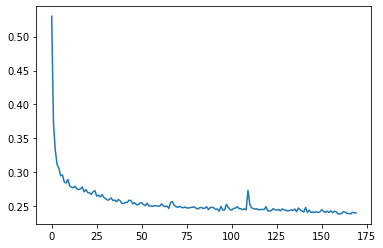

In [141]:
figure= subplot
plt.plot(history.history['loss'])


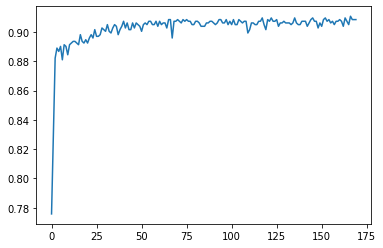

In [118]:
plt.plot(history.history['accuracy'])

In [119]:
np.mean(history.history['accuracy'])

0.9026315710123848

In [184]:
np.mean(history.history['loss'])



0.2553914999260622

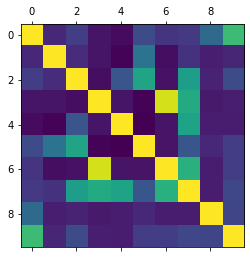

In [105]:
plt.matshow(cheap_food_2.corr())

In [106]:
clean_merged.corr()

,usd_rate,protein,fat,carb,sugar,sodium,calcium,kcal,2019,expensive
usd_rate,1.000000,0.015783,0.014647,-0.015984,-0.022786,0.044673,0.005327,0.013134,0.252970,0.253613
protein,0.015783,1.000000,0.045290,-0.030963,-0.079074,0.340348,-0.048464,0.066095,0.000142,0.075743
fat,0.014647,0.045290,1.000000,-0.050675,0.197445,0.537494,-0.034200,0.514565,0.018741,0.046310
carb,-0.015984,-0.030963,-0.050675,1.000000,-0.027409,-0.079112,0.927147,0.574248,-0.010987,-0.003437
sugar,-0.022786,-0.079074,0.197445,-0.027409,1.000000,-0.090323,-0.025740,0.541771,-0.005259,-0.077232
sodium,0.044673,0.340348,0.537494,-0.079112,-0.090323,1.000000,-0.031667,0.201770,0.036188,0.149014
calcium,0.005327,-0.048464,-0.034200,0.927147,-0.025740,-0.031667,1.000000,0.602167,-0.007908,0.110454
kcal,0.013134,0.066095,0.514565,0.574248,0.541771,0.201770,0.602167,1.000000,-0.003538,0.067205
2019,0.252970,0.000142,0.018741,-0.010987,-0.005259,0.036188,-0.007908,-0.003538,1.000000,0.241923
expensive,0.253613,0.075743,0.046310,-0.003437,-0.077232,0.149014,0.110454,0.067205,0.241923,1.000000


In [448]:
import joblib


In [507]:
#joblib.dump(model, 'nn_model_v1.joblib')

In [413]:
model

In [442]:
model.save('neural_network_v1.h5')

In [505]:
food_categories.to_csv('../raw_data/food_categories.csv', index=False)


In [506]:
pd.read_csv('../raw_data/food_categories.csv')

,product
0,Baked Products
1,Other starchy vegetables
2,"Chips, Pretzels & Snacks"
3,Cereal Grains and Pasta
4,Sweets
5,Sausages and Luncheon Meats
6,Dairy and Egg Products
7,Pre-Packaged Fruit & Vegetables
8,Fats and Oils
9,Finfish and Shellfish Products


In [508]:
X_test

array([[1.19500000e-01, 9.56591640e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.20289855e-03, 6.75707162e-04, 6.47604126e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.50000000e-02, 1.51125402e-03, 7.20720721e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.40000000e-02, 6.83279743e-03, 6.76576577e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.94500000e-02, 2.90996785e-03, 7.95495495e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.93000000e-01, 3.32797428e-02, 2.51351351e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [527]:
cheap_food_2.head(1)

,adm0_name,type,pt_name,usd_rate,protein,fat,carb,sugar,sodium,calcium,kcal,category,2019,expensive
0,Afghanistan,Bread,Retail,0.487571,94.3,35.9,492.0,34.5,4770.0,2110.0,11300.0,Baked Products,149.895975,0


In [511]:
model.predict('87.5','')

0       0
1       0
2       0
3       0
4       0
       ..
1245    0
1246    0
1247    0
1248    0
1249    0
Name: expensive, Length: 1227, dtype: int64

### Importing the same mode

In [583]:
from tensorflow.keras.models import load_model
imp_model = load_model('neural_network_v1.1.h5')

In [604]:
imp_prep = joblib.load('preprocessor_v1.joblib')

In [576]:
#merged_df

In [547]:
point = cheap_food_2.head(1).filter(items=['category', 'pt_name', 'protein', 'fat', 'carb', 'sugar', 'sodium',
       'calcium', 'kcal', '2019'])
point

,category,pt_name,protein,fat,carb,sugar,sodium,calcium,kcal,2019
0,Baked Products,Retail,94.3,35.9,492.0,34.5,4770.0,2110.0,11300.0,149.895975


In [605]:

point_t = imp_prep.transform(point)
point_t

array([[4.71500000e-02, 5.77170418e-03, 4.43243243e-02, 4.35606061e-04,
        8.58943577e-02, 9.49025487e-03, 1.95501730e-01, 2.83908439e-03,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [606]:

prediction = imp_model.predict(point_t)

In [609]:
print(prediction[0][0])
if prediction[0][0] > 0.5:
    
    print('Expensive')
    
else:
    print('Not Expensive')

1.1273446e-16
Not Expensive


In [610]:
prediction_2 = imp_model.predict(X_t)
prediction_2

array([[1.1273488e-16],
       [1.0231833e-30],
       [9.7961034e-33],
       ...,
       [1.3591061e-12],
       [9.2045797e-05],
       [5.3042921e-26]], dtype=float32)

<AxesSubplot:>

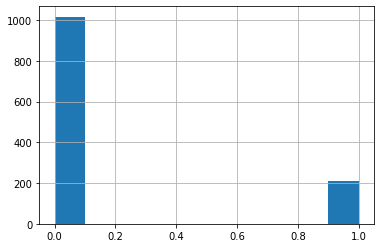

In [624]:
pd.DataFrame(prediction_2, columns=['prediction'])['prediction'].apply(lambda x: 1 if x > 0.5 else 0).hist()

In [629]:
plt.scatter(pd.DataFrame(prediction_2, columns=['prediction'])['prediction'])

TypeError: scatter() missing 1 required positional argument: 'y'

In [630]:
pd.DataFrame(prediction_2, columns=['prediction'])['prediction'].loc[pd.DataFrame(prediction_2, columns=['prediction'])['prediction'] > 0.5]

6       0.651420
7       0.651420
8       0.651420
15      0.999999
19      0.666523
          ...   
1207    0.914898
1208    0.992467
1213    0.999158
1214    0.999158
1215    0.994147
Name: prediction, Length: 211, dtype: float32

In [631]:
pd.DataFrame(prediction_2, columns=['prediction'])['prediction'].loc[pd.DataFrame(prediction_2, columns=['prediction'])['prediction'] < 0.5]

0       1.127349e-16
1       1.023183e-30
2       9.796103e-33
3       1.194373e-12
4       1.194373e-12
            ...     
1222    1.359106e-12
1223    1.415534e-12
1224    1.359106e-12
1225    9.204580e-05
1226    5.304292e-26
Name: prediction, Length: 1016, dtype: float32

In [159]:
loss = history.history['loss']
acc = history.history['accuracy']
it = np.arange(1,len(history.history['loss'])+1)

In [180]:
def draw_result(lst_iter, lst_loss, lst_acc, title):
    plt.figure(figsize=(12,8))
    plt.plot(lst_iter, lst_loss, '-b', label='loss')
    plt.plot(lst_iter, lst_acc, '-r', label='accuracy')

    plt.xlabel("n iteration")
    plt.legend(loc='upper left')
    plt.title(title)

    # save image
    plt.savefig(title+".png")  # should before show method

    # show
    plt.show()

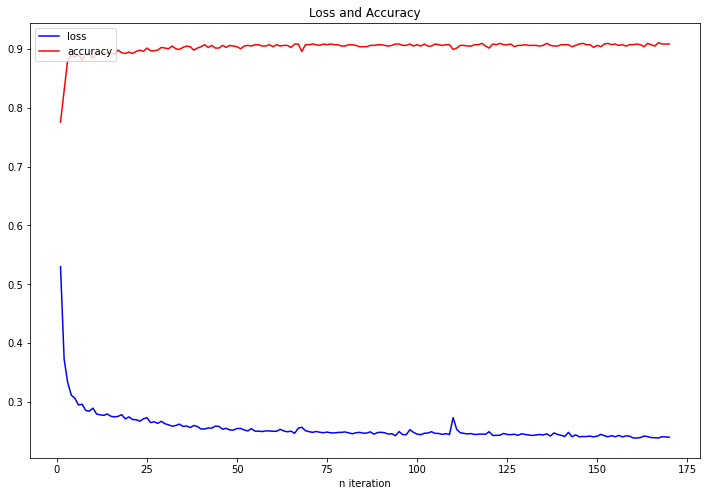

In [183]:
draw_result(it,loss,acc,'Loss and Accuracy')

In [189]:
y.value_counts()[0]/len(y)

0.7814251401120896

In [192]:
merged_df['adm0_name'].nunique()

71

In [193]:
X

,category,pt_name,protein,fat,carb,sugar,sodium,calcium,kcal,2019
0,Baked Products,Retail,94.300000,35.9,492.000000,34.5,4770.000000,2110.000000,11300.000000,149.895975
1,Other starchy vegetables,Retail,12.600000,32.4,309.000000,12.0,1160.000000,30.000000,1440.000000,149.895975
2,"Chips, Pretzels & Snacks",Retail,639.285714,255.0,2167.857143,0.0,14035.714286,3821.428571,14035.714286,149.895975
3,Cereal Grains and Pasta,Retail,71.900000,38.5,755.000000,96.8,10.000000,100.000000,3650.000000,149.895975
4,Cereal Grains and Pasta,Retail,71.900000,38.5,755.000000,96.8,10.000000,100.000000,3650.000000,149.895975
...,...,...,...,...,...,...,...,...,...,...
1245,Cereal Grains and Pasta,Retail,87.500000,50.9,739.000000,4.7,50.000000,50.000000,3640.000000,109.251270
1246,Cereal Grains and Pasta,Retail,71.900000,38.5,755.000000,96.8,10.000000,100.000000,3650.000000,109.251270
1247,Cereal Grains and Pasta,Retail,87.500000,50.9,739.000000,4.7,50.000000,50.000000,3640.000000,109.251270
1248,Baking Decorations & Dessert Toppings,Retail,2000.000000,2000.0,1000.000000,1000.0,0.000000,NaN,30000.000000,NaN


In [195]:
pd.DataFrame(y)

,expensive
0,0
1,0
2,0
3,0
4,0
...,...
1245,0
1246,0
1247,0
1248,0


In [197]:
pd.DataFrame(y.value_counts())

,expensive
0,976
1,273


In [201]:
clean_merged.filter(items=['adm0_name','2019'])

AttributeError: 'DataFrame' object has no attribute 'unique'

In [252]:
clean_cpi = clean_merged.groupby(by='adm0_name').mean().filter(items=['2019']).reset_index()

In [253]:
clean_cpi['2019'].mean()

434.52994637377054

In [254]:
clean_cpi['2019']

0     149.895975
1     378.883721
2            NaN
3     129.176007
4     179.679822
         ...    
66    113.310442
67    234.437126
68    173.871268
69           NaN
70    212.308759
Name: 2019, Length: 71, dtype: float64

In [255]:
clean_cpi['2019'].mean()

434.52994637377054

In [256]:
clean_cpi['2019'].replace(np.nan, 434,inplace=True)

In [257]:
clean_cpi.to_csv('../raw_data/country_cpi.csv', index=False)

In [258]:
pd.read_csv('../raw_data/country_cpi.csv')

,adm0_name,2019
0,Afghanistan,149.895975
1,Angola,378.883721
2,Argentina,434.000000
3,Armenia,129.176007
4,Bangladesh,179.679822
...,...,...
66,Togo,113.310442
67,Turkey,234.437126
68,Uganda,173.871268
69,Yemen,434.000000


In [289]:
test = nutrients_super('watermelon')

switched to branded


In [295]:
test.keys()

dict_keys(['protein', 'fat', 'carb', 'sugar', 'sodium', 'cholesterol', 'calcium', 'kcal', 'size', 'unit', 'category'])

In [326]:
test

{'protein': 0.78,
 'fat': 0.25,
 'carb': 7.45,
 'sugar': 0.0,
 'sodium': 0.0,
 'cholesterol': 0.0,
 'calcium': 'not found',
 'kcal': 31.0,
 'size': 255.10000610351562,
 'unit': 'g',
 'category': 'Pre-Packaged Fruit & Vegetables'}

In [325]:
pd.DataFrame.from_dict(test)

ValueError: If using all scalar values, you must pass an index

In [320]:
type(test)

dict

In [347]:
pd.DataFrame(list(test.values().transpose()), columns=list(test))

AttributeError: 'dict_values' object has no attribute 'transpose'

In [287]:
country = "Belarus"
answer = clean_cpi.loc[clean_cpi['adm0_name'] == country]['2019'].to_list()[0]

In [286]:
answer

508.3392944

In [276]:
clean_cpi

,adm0_name,2019
0,Afghanistan,149.895975
1,Angola,378.883721
2,Argentina,434.000000
3,Armenia,129.176007
4,Bangladesh,179.679822
...,...,...
66,Togo,113.310442
67,Turkey,234.437126
68,Uganda,173.871268
69,Yemen,434.000000


In [337]:
test.items()

dict_items([('protein', 0.78), ('fat', 0.25), ('carb', 7.45), ('sugar', 0.0), ('sodium', 0.0), ('cholesterol', 0.0), ('calcium', 'not found'), ('kcal', 31.0), ('size', 255.10000610351562), ('unit', 'g'), ('category', 'Pre-Packaged Fruit & Vegetables')])

In [363]:
test2 =pd.DataFrame.from_dict(test.items()).transpose()

In [364]:
test2

,0,1,2,3,4,5,6,7,8,9,10
0,protein,fat,carb,sugar,sodium,cholesterol,calcium,kcal,size,unit,category
1,0.78,0.25,7.45,0.0,0.0,0.0,not found,31.0,255.100006,g,Pre-Packaged Fruit & Vegetables


In [365]:
test2.columns = test2.iloc[0]

In [367]:
test2.iloc[1]

0
protein                                   0.78
fat                                       0.25
carb                                      7.45
sugar                                      0.0
sodium                                     0.0
cholesterol                                0.0
calcium                              not found
kcal                                      31.0
size                                255.100006
unit                                         g
category       Pre-Packaged Fruit & Vegetables
Name: 1, dtype: object

In [358]:
test2

0
protein            protein
fat                    fat
carb                  carb
sugar                sugar
sodium              sodium
cholesterol    cholesterol
calcium            calcium
kcal                  kcal
size                  size
unit                  unit
category          category
Name: 0, dtype: object

In [419]:
dict2 = {}
for k,v in test.items():
    dict2[k] = [v]
    print(k, v)

protein 0.78
fat 0.25
carb 7.45
sugar 0.0
sodium 0.0
cholesterol 0.0
calcium not found
kcal 31.0
size 255.10000610351562
unit g
category Pre-Packaged Fruit & Vegetables


In [422]:
pd.DataFrame.from_dict(dict2).replace('not found', np.nan)

,protein,fat,carb,sugar,sodium,cholesterol,calcium,kcal,size,unit,category
0,0.78,0.25,7.45,0.0,0.0,0.0,NaN,31.0,255.100006,g,Pre-Packaged Fruit & Vegetables


In [421]:
dict2

{'protein': [0.78],
 'fat': [0.25],
 'carb': [7.45],
 'sugar': [0.0],
 'sodium': [0.0],
 'cholesterol': [0.0],
 'calcium': ['not found'],
 'kcal': [31.0],
 'size': [255.10000610351562],
 'unit': ['g'],
 'category': ['Pre-Packaged Fruit & Vegetables']}